In [282]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import os
import glob
from scipy.io import wavfile
import librosa
import librosa.display


In [283]:
data_dir = '../../data/raw_data/zenodo.4008297/'
save_fp = '../../data/processed_data/specgram_db.npy'



In [284]:
data_fp = data_dir + 'B_ANI01_MC_FN_SIM01_301.wav'
data_fp


'../../data/raw_data/zenodo.4008297/B_ANI01_MC_FN_SIM01_301.wav'

visualize one sample

In [285]:
datasample, ratesample = librosa.load(data_fp, sr=None)



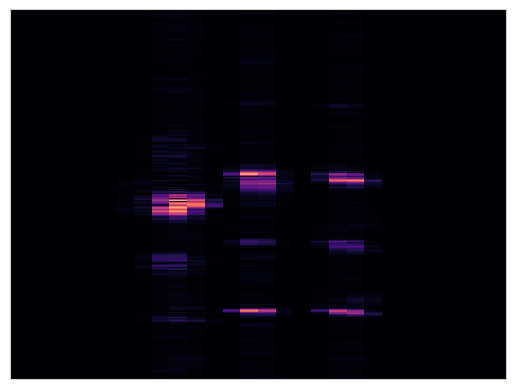

In [286]:
specgram_sample = librosa.stft(datasample)
librosa.display.specshow(specgram_sample)


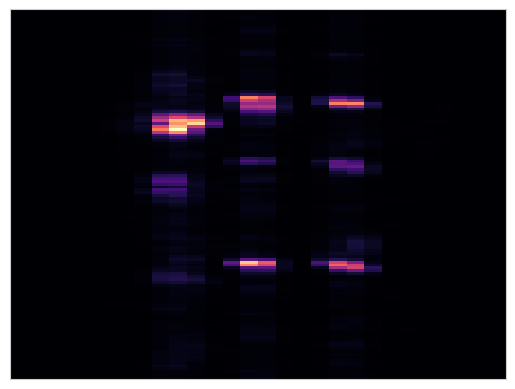

In [287]:
specmag_sample,_ = librosa.magphase(specgram_sample)
mel_scale_sgram_sample = librosa.feature.melspectrogram(S=specmag_sample,sr=ratesample)
librosa.display.specshow(mel_scale_sgram_sample)



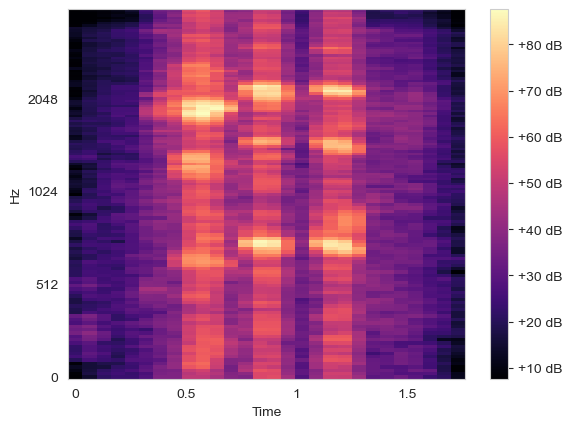

In [288]:
mel_spec_db_sample = librosa.amplitude_to_db(mel_scale_sgram_sample,ref=np.min)
librosa.display.specshow(mel_spec_db_sample, sr = ratesample, x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')



restore specgrams for all the data

In [289]:
#save figures for all the data
data_fps = glob.glob(os.path.join(data_dir, '*'))
arrs = []
for data_fp in data_fps:
    datalib, ratelib = librosa.load(data_fp, sr=None)
    specgram = librosa.stft(datalib)
    specmag,_ = librosa.magphase(specgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=specmag,sr=ratelib)
    mel_spec_db = librosa.amplitude_to_db(mel_scale_sgram,ref=np.min)
    arrs.append(mel_spec_db)
    

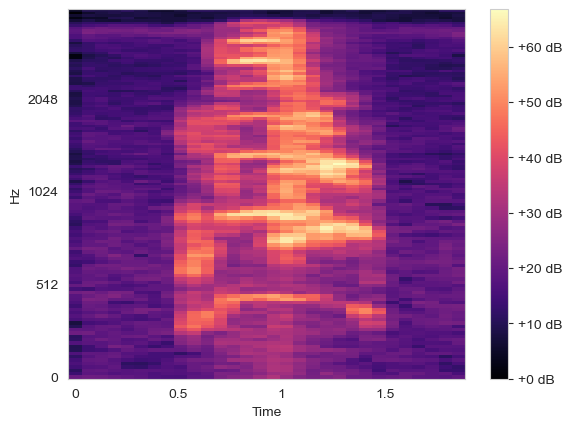

In [290]:
##just to check

librosa.display.specshow(arrs[5], sr = ratesample, x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')


In [291]:
shapes0 = [_.shape[0] for _ in arrs]
max_shape0 = np.max(shapes0) ##this is a bit unnecessary because this dimension is the same for all the data, just trying to be consistent with the other dimension
shapes1 = [_.shape[1] for _ in arrs]
max_shape1 = np.max(shapes1)+1 ##I added one for this just to make sure all rows are added -1 (just to make recover easier)


In the cell below, I filled in with "-1" instead of "0", because I'm afraid adding zeros whould change the figure, so I added -1 because -1 wasn't there in the original data. This should be good for future convenience to remove it.


In [292]:
spec_data = []
for i in range(len(arrs)):
    spec_data.append(np.pad(arrs[i], ((0, 0), (max_shape0-arrs[i].shape[0], max_shape1 - arrs[i].shape[1])), mode='constant',constant_values=-1))

spec_data = np.array(spec_data) ##transfered it to numpy array
    

In [293]:
spec_data.shape


(440, 128, 64)

In [294]:
np.save(save_fp,spec_data)

In [295]:
##let's try to see how to recover the data without -1. 
spec_load = np.load(save_fp)

arrs_load = []
for i in range(spec_load.shape[0]):
    unpadded_indice = np.argmax(spec_load[i][0] == -1)##I have no idea why this should be argmax, but it works
    #print(unpadded_indice)
    unpadded_array = spec_load[i][:, :unpadded_indice]
    arrs_load.append(unpadded_array)

In [298]:
#for i in range(len(arrs)):
    #print(arrs[i]-arrs_load[i])
    
##okay, recovered!!

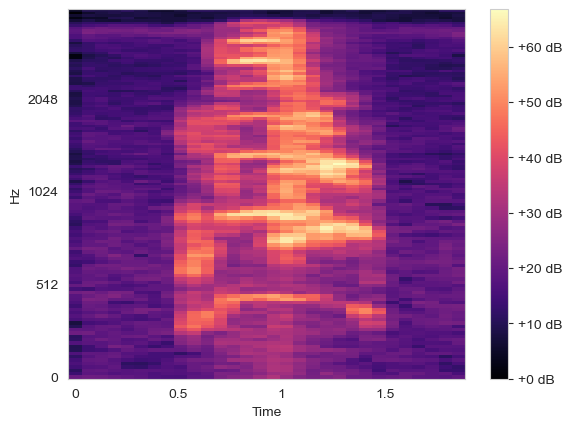

In [299]:
librosa.display.specshow(arrs_load[5], sr = ratesample, x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')

